In [163]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib numpy scikit-learn seaborn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl (10.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached python_version-0.0.2-py2.py3-no

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\gandr\AppData\Local\Temp\pip-install-tyv1bhm2\tensorflow-gpu_2c87a18b702c417d892d4a1021a77a99\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil

In [244]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [245]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [246]:
data_dir = 'model/data'
os.listdir(data_dir)


['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']

In [247]:
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

## Building data pipeline

In [248]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 18000 files belonging to 12 classes.


To access our data pipeline

In [249]:
data_iterator = data.as_numpy_iterator()

Accessing data pipeline

In [250]:
batch =data_iterator.next()
batch

(array([[[[2.50781250e+01, 4.69062500e+01, 3.95468750e+01],
          [3.85625000e+01, 4.67656250e+01, 4.44687500e+01],
          [5.46562500e+01, 5.68281250e+01, 5.83906250e+01],
          ...,
          [1.63437500e+01, 3.21093750e+01, 2.70000000e+01],
          [1.69843750e+01, 3.27500000e+01, 2.82968750e+01],
          [1.70937500e+01, 3.28593750e+01, 2.84062500e+01]],
 
         [[2.96250000e+01, 5.57968750e+01, 4.67968750e+01],
          [3.05156250e+01, 4.69687500e+01, 4.13906250e+01],
          [5.22968750e+01, 6.22343750e+01, 5.89218750e+01],
          ...,
          [1.12812500e+01, 3.42656250e+01, 2.87812500e+01],
          [1.23593750e+01, 3.58125000e+01, 3.13593750e+01],
          [1.14218750e+01, 3.48750000e+01, 3.04218750e+01]],
 
         [[2.93437500e+01, 4.70312500e+01, 4.14062500e+01],
          [3.30468750e+01, 4.97656250e+01, 4.34062500e+01],
          [5.58281250e+01, 7.12031250e+01, 6.40156250e+01],
          ...,
          [9.15625000e+00, 2.94062500e+01, 2.2218

In [251]:
len(batch)

2

Images represented as np arrays, 0 is the image, 1 is the class

In [252]:
batch[0].shape

(32, 256, 256, 3)

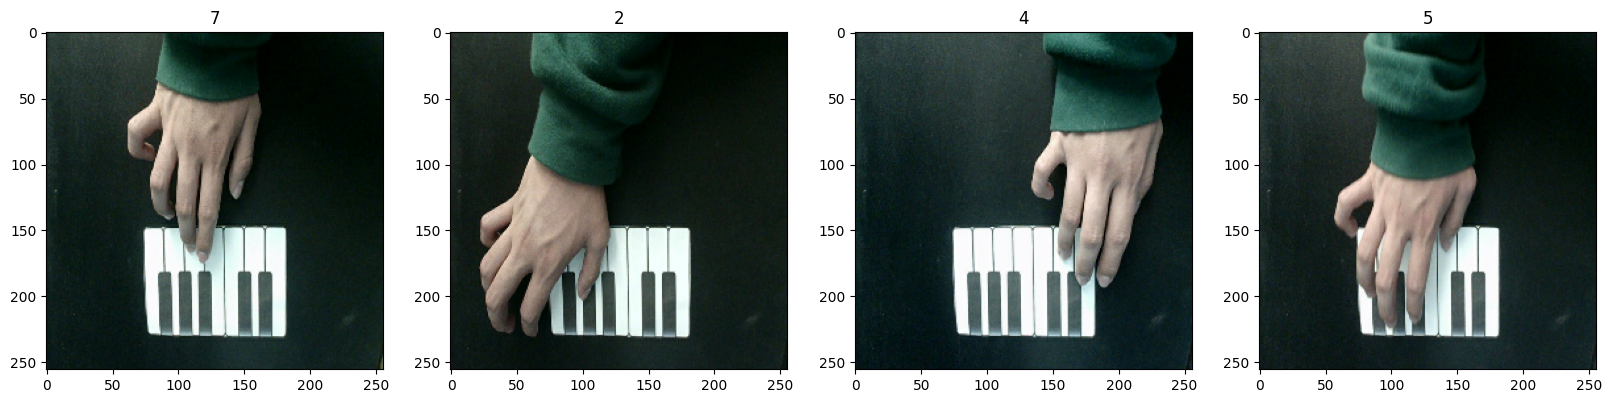

In [253]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing
map function allows us to preprocess data while it is passing trough data pipeline

In [254]:
data = data.map(lambda x,y: (x/255, y))

In [255]:
scaled_iterator = data.as_numpy_iterator()

In [256]:
batch = scaled_iterator.next()


In [257]:
batch[0].max()

1.0

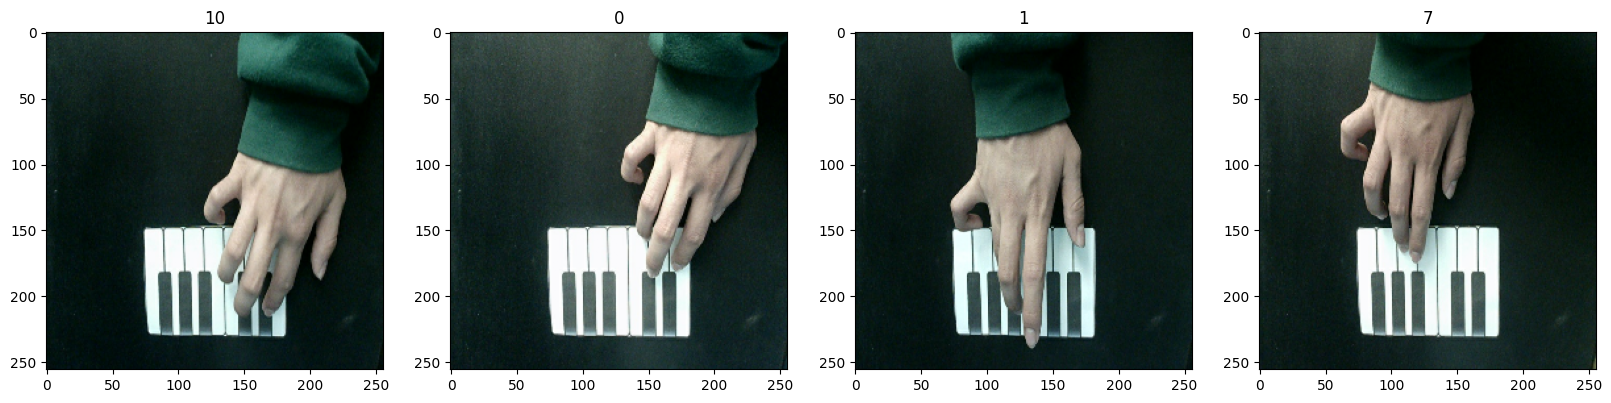

In [258]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Model

In [259]:
len(data)

563

In [260]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [261]:
train_size + val_size +test_size

563

In [262]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## CNN model

In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [264]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(4,4))

model.add(Flatten())

model.add(Dense(22, activation='relu'))

model.add(Dense(12, activation ='softmax'))

c:\Users\gandr\Documents\vsproj\GitHub\PDS-Piano\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [265]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 22)             │     1,397,110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 12)             │           276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,397,834 (5.33 MB)

 Trainable params: 1,397,834 (5.33 MB)

 Non-trainable params: 0 (0.00 B)

In [266]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [267]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [268]:

history = model.fit(train, epochs=10,
                    validation_data=val,
                    callbacks=[tensorboard_callback])

Epoch 1/10


c:\Users\gandr\Documents\vsproj\GitHub\PDS-Piano\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


394/394 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.1970 - loss: 2.0781 - val_accuracy: 0.4925 - val_loss: 1.2102
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.5268 - loss: 1.1281 - val_accuracy: 0.6624 - val_loss: 0.8474
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.6634 - loss: 0.8244 - val_accuracy: 0.7054 - val_loss: 0.7222
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.7127 - loss: 0.7035 - val_accuracy: 0.7617 - val_loss: 0.6009
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.7772 - loss: 0.5858 - val_accuracy: 0.8412 - val_loss: 0.5024
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.8280 - loss: 0.5027 - val_accuracy: 0.8030 - val_loss: 0.4999
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.8563 - loss: 0.4335 - val_accuracy: 0.8867 - val_loss: 0.3885
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.8843 - loss: 0.3756 - val

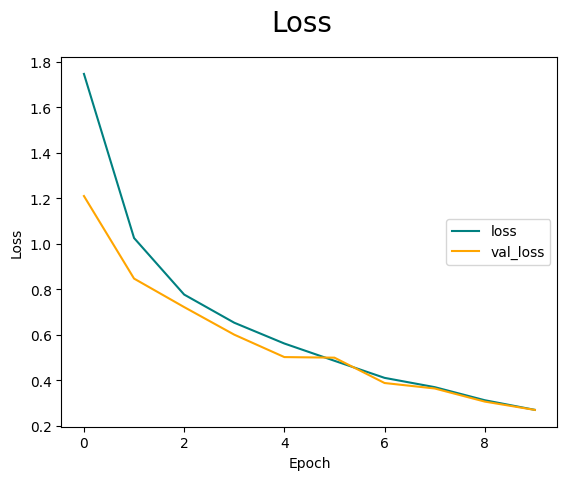

In [269]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color = 'orange', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='right')
plt.show()



57/57 - 10s - 171ms/step - accuracy: 0.9082 - loss: 0.2973
0.9081858396530151


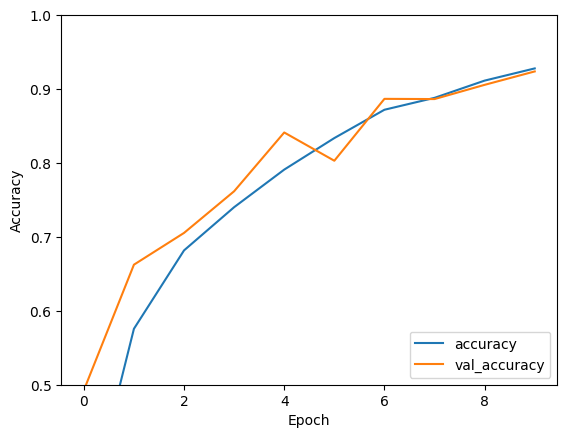

In [270]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test, verbose=2)

print(test_acc)

### Evaluation Metrics

In [271]:
from sklearn.metrics import accuracy_score, precision_score

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through each batch in the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    # Predict the output labels for the input images
    yhat = model.predict(X)
    # Convert predicted probabilities to class labels
    predicted_labels.extend(yhat.argmax(axis=1))
    # Extend true_labels directly with class indices
    true_labels.extend(y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

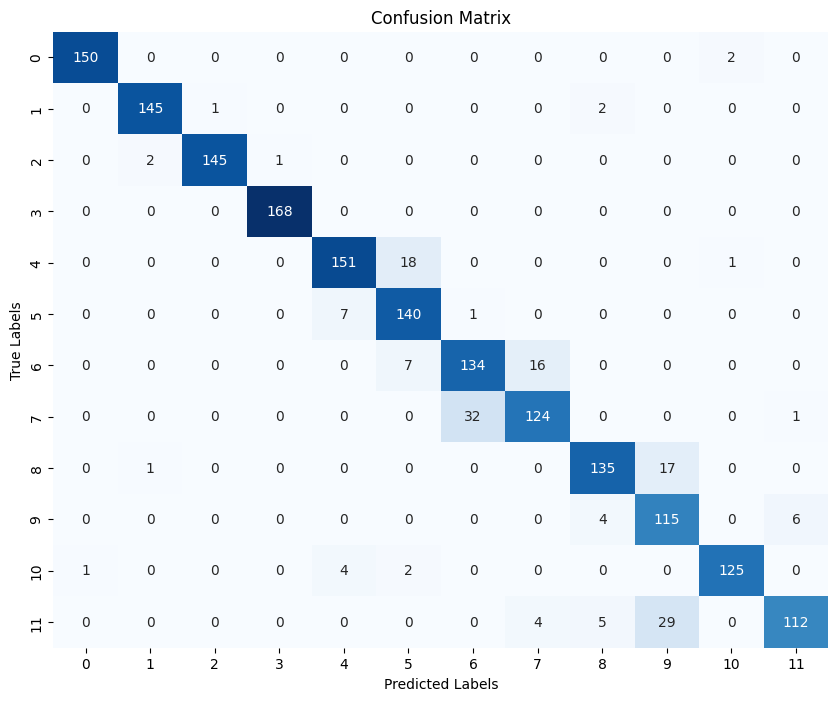

In [272]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [273]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')  # You can use other averaging methods as well
print("Precision:", precision)

Accuracy: 0.9092920353982301
Precision: 0.9125792830733014


Number of predictions:  1808


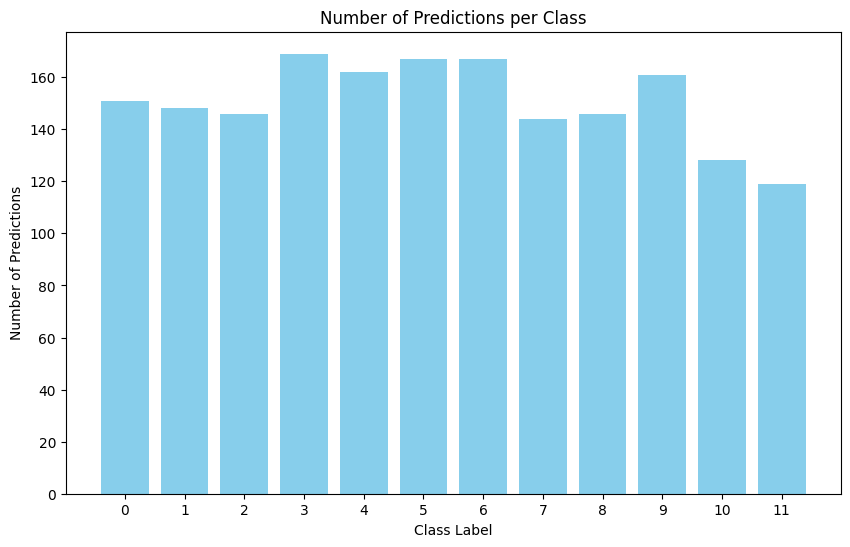

In [274]:
import matplotlib.pyplot as plt

# Count the occurrences of each predicted label
predicted_counts = {}
for label in predicted_labels:
    if label in predicted_counts:
        predicted_counts[label] += 1
    else:
        predicted_counts[label] = 1

# Sort the predicted counts by class label
sorted_predicted_counts = sorted(predicted_counts.items())

# Extract labels and counts
labels, counts = zip(*sorted_predicted_counts)

print('Number of predictions: ', len(predicted_labels))

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions per Class')
plt.xticks(labels)
plt.show()


In [275]:
from sklearn.metrics import classification_report

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.98      0.98      0.98       148
           2       0.99      0.98      0.99       148
           3       0.99      1.00      1.00       168
           4       0.93      0.89      0.91       170
           5       0.84      0.95      0.89       148
           6       0.80      0.85      0.83       157
           7       0.86      0.79      0.82       157
           8       0.92      0.88      0.90       153
           9       0.71      0.92      0.80       125
          10       0.98      0.95      0.96       132
          11       0.94      0.75      0.83       150

    accuracy                           0.91      1808
   macro avg       0.91      0.91      0.91      1808
weighted avg       0.92      0.91      0.91      1808



### Exporting the model

In [276]:
from tensorflow.keras.models import load_model

In [277]:
model.save(os.path.join('model','pianoHand.h5'))

### How to load it

In [278]:
os.path.join('model','pianoHand.h5')

'model\\pianoHand.h5'

In [ ]:
new_model = load_model(os.path.join('model','pianoHand.h5'))
# predict = new_predict(X)